## Рекомендация по оттоку

## Загрузка библиотек

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score

from catboost import CatBoostClassifier
from catboost import cv
from catboost import Pool
import catboost as cat

from lightgbm import LGBMRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [2]:
df_contract = pd.read_csv('/datasets/final_provider/contract.csv')
df_personal = pd.read_csv('/datasets/final_provider/personal.csv')
df_internet = pd.read_csv('/datasets/final_provider/internet.csv')
df_phone = pd.read_csv('/datasets/final_provider/phone.csv')

## Знакомство с данными

In [3]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
customerID          7043 non-null object
BeginDate           7043 non-null object
EndDate             7043 non-null object
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [4]:
df_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
customerID       7043 non-null object
gender           7043 non-null object
SeniorCitizen    7043 non-null int64
Partner          7043 non-null object
Dependents       7043 non-null object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [5]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
customerID          5517 non-null object
InternetService     5517 non-null object
OnlineSecurity      5517 non-null object
OnlineBackup        5517 non-null object
DeviceProtection    5517 non-null object
TechSupport         5517 non-null object
StreamingTV         5517 non-null object
StreamingMovies     5517 non-null object
dtypes: object(8)
memory usage: 344.9+ KB


In [6]:
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
customerID       6361 non-null object
MultipleLines    6361 non-null object
dtypes: object(2)
memory usage: 99.5+ KB


Количество записей в датафреймах разное, возможно, это первая недостающая информация ?

In [7]:
df_contract.head(30)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
5,9305-CDSKC,2019-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.65,820.5
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,301.9
8,7892-POOKP,2017-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,104.80,3046.05
9,6388-TABGU,2014-12-01,No,One year,No,Bank transfer (automatic),56.15,3487.95


In [8]:
df_personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [9]:
df_internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [10]:
df_phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [11]:
df_contract.isna().sum()

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [12]:
df_personal.isna().sum()

customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

In [13]:
df_internet.isna().sum()

customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

In [14]:
df_phone.isna().sum()

customerID       0
MultipleLines    0
dtype: int64

## Предобработка данных

In [15]:
df = df_contract.set_index('customerID').join(df_phone.set_index('customerID'))

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 8 columns):
BeginDate           7043 non-null object
EndDate             7043 non-null object
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
MultipleLines       6361 non-null object
dtypes: float64(1), object(7)
memory usage: 815.2+ KB


в MultipleLines не хватает данных, заполним пропуски на значение No, так как этих данных нет

In [17]:
df['MultipleLines'].fillna('No', inplace = True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 8 columns):
BeginDate           7043 non-null object
EndDate             7043 non-null object
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
MultipleLines       7043 non-null object
dtypes: float64(1), object(7)
memory usage: 815.2+ KB


In [19]:
df = df.join(df_internet.set_index('customerID'))

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 15 columns):
BeginDate           7043 non-null object
EndDate             7043 non-null object
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
MultipleLines       7043 non-null object
InternetService     5517 non-null object
OnlineSecurity      5517 non-null object
OnlineBackup        5517 non-null object
DeviceProtection    5517 non-null object
TechSupport         5517 non-null object
StreamingTV         5517 non-null object
StreamingMovies     5517 non-null object
dtypes: float64(1), object(14)
memory usage: 1.2+ MB


In [21]:
df = df.join(df_personal.set_index('customerID'))

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
BeginDate           7043 non-null object
EndDate             7043 non-null object
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
MultipleLines       7043 non-null object
InternetService     5517 non-null object
OnlineSecurity      5517 non-null object
OnlineBackup        5517 non-null object
DeviceProtection    5517 non-null object
TechSupport         5517 non-null object
StreamingTV         5517 non-null object
StreamingMovies     5517 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
dtypes: float64(1), int64(1), object(17)
memory usage: 1.4+ MB


заполним по аналогии с MultipleLines где не хватает данных, пропуски на значение No, так как этих данных нет

In [23]:
df['InternetService'].fillna('No', inplace = True)
df['OnlineSecurity'].fillna('No', inplace = True)
df['OnlineBackup'].fillna('No', inplace = True)
df['DeviceProtection'].fillna('No', inplace = True)
df['TechSupport'].fillna('No', inplace = True)
df['StreamingTV'].fillna('No', inplace = True)
df['StreamingMovies'].fillna('No', inplace = True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
BeginDate           7043 non-null object
EndDate             7043 non-null object
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
dtypes: float64(1), int64(1), object(17)
memory usage: 1.4+ MB


In [25]:
df['BeginDate']

customerID
7590-VHVEG    2020-01-01
5575-GNVDE    2017-04-01
3668-QPYBK    2019-10-01
7795-CFOCW    2016-05-01
9237-HQITU    2019-09-01
                 ...    
6840-RESVB    2018-02-01
2234-XADUH    2014-02-01
4801-JZAZL    2019-03-01
8361-LTMKD    2019-07-01
3186-AJIEK    2014-08-01
Name: BeginDate, Length: 7043, dtype: object

In [26]:
#sns.distplot(df['BeginDate'].dt.year)

In [27]:
df['BeginDate'] = pd.to_datetime(df['BeginDate'], format = '%Y-%m-%d')

In [28]:
df['BeginDate']

customerID
7590-VHVEG   2020-01-01
5575-GNVDE   2017-04-01
3668-QPYBK   2019-10-01
7795-CFOCW   2016-05-01
9237-HQITU   2019-09-01
                ...    
6840-RESVB   2018-02-01
2234-XADUH   2014-02-01
4801-JZAZL   2019-03-01
8361-LTMKD   2019-07-01
3186-AJIEK   2014-08-01
Name: BeginDate, Length: 7043, dtype: datetime64[ns]

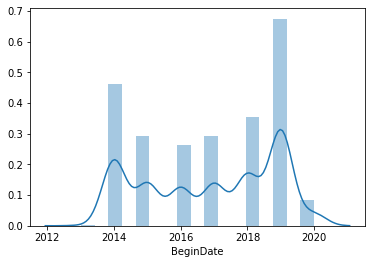

In [29]:
sns.distplot(df['BeginDate'].dt.year)

In [30]:
df['EndDate']

customerID
7590-VHVEG                     No
5575-GNVDE                     No
3668-QPYBK    2019-12-01 00:00:00
7795-CFOCW                     No
9237-HQITU    2019-11-01 00:00:00
                     ...         
6840-RESVB                     No
2234-XADUH                     No
4801-JZAZL                     No
8361-LTMKD    2019-11-01 00:00:00
3186-AJIEK                     No
Name: EndDate, Length: 7043, dtype: object

In [31]:
#sns.distplot(df['EndDate'].dt.year)

In [32]:
_ = pd.to_datetime(df.loc[df['EndDate'] != 'No' ,'EndDate'], format = '%Y-%m-%dT%H:%M:%S', errors='ignore')

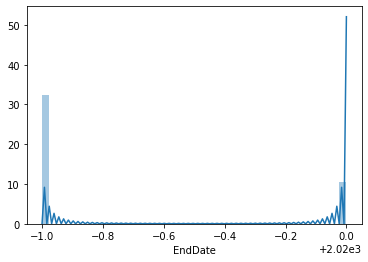

In [33]:
sns.distplot(_.dt.year)

In [34]:
_.isna().sum()

0

In [35]:
df_contract['EndDate'].isna().sum()

0

In [36]:
df_contract['EndDate']

0                        No
1                        No
2       2019-12-01 00:00:00
3                        No
4       2019-11-01 00:00:00
               ...         
7038                     No
7039                     No
7040                     No
7041    2019-11-01 00:00:00
7042                     No
Name: EndDate, Length: 7043, dtype: object

In [37]:
_ = pd.to_datetime(df.loc[df['EndDate'] != 'No' ,'EndDate'], format = '%Y-%m-%dT%H:%M:%S', errors='ignore')

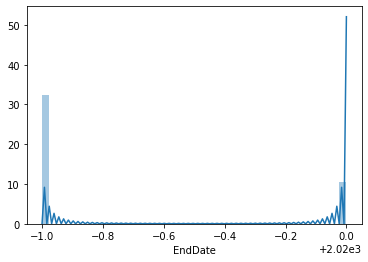

In [38]:
sns.distplot(_.dt.year)

почему не получается в df['EndDate] применить формат format = '%Y-%m-%dT%H:%M:%S' ??

In [39]:
df['MonthlyCharges']

customerID
7590-VHVEG     29.85
5575-GNVDE     56.95
3668-QPYBK     53.85
7795-CFOCW     42.30
9237-HQITU     70.70
               ...  
6840-RESVB     84.80
2234-XADUH    103.20
4801-JZAZL     29.60
8361-LTMKD     74.40
3186-AJIEK    105.65
Name: MonthlyCharges, Length: 7043, dtype: float64

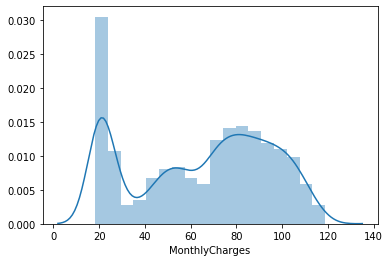

In [40]:
sns.distplot(df['MonthlyCharges'])

по данному срезу можно сделать вывод, что основное количество пользователей работают с тарифом , ценник по которому в районе 20

In [41]:
df['TotalCharges']

customerID
7590-VHVEG      29.85
5575-GNVDE     1889.5
3668-QPYBK     108.15
7795-CFOCW    1840.75
9237-HQITU     151.65
               ...   
6840-RESVB     1990.5
2234-XADUH     7362.9
4801-JZAZL     346.45
8361-LTMKD      306.6
3186-AJIEK     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [42]:
#sns.distplot(df['TotalCharges'])

In [43]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

In [44]:
df['TotalCharges'].isna().sum()

11

In [45]:
df['TotalCharges'].isna()

customerID
7590-VHVEG    False
5575-GNVDE    False
3668-QPYBK    False
7795-CFOCW    False
9237-HQITU    False
              ...  
6840-RESVB    False
2234-XADUH    False
4801-JZAZL    False
8361-LTMKD    False
3186-AJIEK    False
Name: TotalCharges, Length: 7043, dtype: bool

In [46]:
# Заменим пропуски на 0
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [47]:
df['TotalCharges'].isna().sum()

0

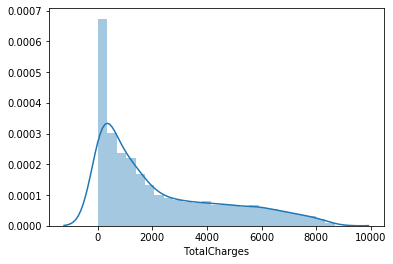

In [48]:
sns.distplot(df['TotalCharges'])

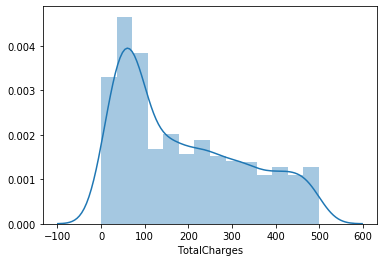

In [49]:
sns.distplot(df[df['TotalCharges'] < 500]['TotalCharges'])

на основе графика можно сделать вывод, что максимальные суммы по всем платам (TotalCharges) были в пределах 0-150, видимо большинство пользуются данными услугами месяц и затем уходят с тарифа. причины могут быть разными, нужно перепроверить по диапазону дат, когда они уходили, может быть это связано  с изменениями в пакетах услуг у провайдера.

In [50]:
print('Медиана TotalCharges:', df['TotalCharges'].median())
print('Среднее TotalCharges:', df['TotalCharges'].mean())

Медиана TotalCharges: 1394.55
Среднее TotalCharges: 2279.7343035638223


In [51]:
print('Медиана MonthlyCharges:', df['MonthlyCharges'].median())
print('Среднее MonthlyCharges:', df['MonthlyCharges'].mean())

Медиана MonthlyCharges: 70.35
Среднее MonthlyCharges: 64.76169246059918


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
BeginDate           7043 non-null datetime64[ns]
EndDate             7043 non-null object
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(15)
memory usage: 1.4+ MB


In [53]:
tables = ['OnlineSecurity', 'OnlineBackup', 'StreamingTV', 'StreamingMovies', 'SeniorCitizen',\
        'DeviceProtection', 'TechSupport', 'gender', 'Partner', 'Dependents', 'MultipleLines', 'PaperlessBilling']
for i in tables:
    print(i, df[i], sep='\n')


OnlineSecurity
customerID
7590-VHVEG     No
5575-GNVDE    Yes
3668-QPYBK    Yes
7795-CFOCW    Yes
9237-HQITU     No
             ... 
6840-RESVB    Yes
2234-XADUH     No
4801-JZAZL    Yes
8361-LTMKD     No
3186-AJIEK    Yes
Name: OnlineSecurity, Length: 7043, dtype: object
OnlineBackup
customerID
7590-VHVEG    Yes
5575-GNVDE     No
3668-QPYBK    Yes
7795-CFOCW     No
9237-HQITU     No
             ... 
6840-RESVB     No
2234-XADUH    Yes
4801-JZAZL     No
8361-LTMKD     No
3186-AJIEK     No
Name: OnlineBackup, Length: 7043, dtype: object
StreamingTV
customerID
7590-VHVEG     No
5575-GNVDE     No
3668-QPYBK     No
7795-CFOCW     No
9237-HQITU     No
             ... 
6840-RESVB    Yes
2234-XADUH    Yes
4801-JZAZL     No
8361-LTMKD     No
3186-AJIEK    Yes
Name: StreamingTV, Length: 7043, dtype: object
StreamingMovies
customerID
7590-VHVEG     No
5575-GNVDE     No
3668-QPYBK     No
7795-CFOCW     No
9237-HQITU     No
             ... 
6840-RESVB    Yes
2234-XADUH    Yes
4801-JZAZL     No

In [54]:
for i in tables:
    print(i, df[i].value_counts(), sep='\n')

OnlineSecurity
No     5024
Yes    2019
Name: OnlineSecurity, dtype: int64
OnlineBackup
No     4614
Yes    2429
Name: OnlineBackup, dtype: int64
StreamingTV
No     4336
Yes    2707
Name: StreamingTV, dtype: int64
StreamingMovies
No     4311
Yes    2732
Name: StreamingMovies, dtype: int64
SeniorCitizen
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
DeviceProtection
No     4621
Yes    2422
Name: DeviceProtection, dtype: int64
TechSupport
No     4999
Yes    2044
Name: TechSupport, dtype: int64
gender
Male      3555
Female    3488
Name: gender, dtype: int64
Partner
No     3641
Yes    3402
Name: Partner, dtype: int64
Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64
MultipleLines
No     4072
Yes    2971
Name: MultipleLines, dtype: int64
PaperlessBilling
Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


Исходя из оценки переменных в tables данные в основном сбалансированы между собой, явного какого-то перекоса нет, кроме может быть таблицы Dependents, OnlineSecurity и TechSupport, где большинство предпочитают не пользоваться данными услугами. 


Судя по PaperlessBilling большинство пользователей предпочитают все таки получать чеки онлайн. Судя по MultipleLines тоже как услуга  не очень восстребована,  видимо с ростом интернета дополнительные телефонные линии не так сильно и нужны.

In [55]:
df['SeniorCitizen']

customerID
7590-VHVEG    0
5575-GNVDE    0
3668-QPYBK    0
7795-CFOCW    0
9237-HQITU    0
             ..
6840-RESVB    0
2234-XADUH    0
4801-JZAZL    0
8361-LTMKD    1
3186-AJIEK    0
Name: SeniorCitizen, Length: 7043, dtype: int64

In [56]:
df['Type']

customerID
7590-VHVEG    Month-to-month
5575-GNVDE          One year
3668-QPYBK    Month-to-month
7795-CFOCW          One year
9237-HQITU    Month-to-month
                   ...      
6840-RESVB          One year
2234-XADUH          One year
4801-JZAZL    Month-to-month
8361-LTMKD    Month-to-month
3186-AJIEK          Two year
Name: Type, Length: 7043, dtype: object

In [57]:
df['Type'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Type, dtype: int64

In [58]:
df['InternetService']

customerID
7590-VHVEG            DSL
5575-GNVDE            DSL
3668-QPYBK            DSL
7795-CFOCW            DSL
9237-HQITU    Fiber optic
                 ...     
6840-RESVB            DSL
2234-XADUH    Fiber optic
4801-JZAZL            DSL
8361-LTMKD    Fiber optic
3186-AJIEK    Fiber optic
Name: InternetService, Length: 7043, dtype: object

In [59]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

оптоволоконным кабелем пользуются больше чем цифровой абонентской линией

In [60]:
df['PaymentMethod']

customerID
7590-VHVEG             Electronic check
5575-GNVDE                 Mailed check
3668-QPYBK                 Mailed check
7795-CFOCW    Bank transfer (automatic)
9237-HQITU             Electronic check
                        ...            
6840-RESVB                 Mailed check
2234-XADUH      Credit card (automatic)
4801-JZAZL             Electronic check
8361-LTMKD                 Mailed check
3186-AJIEK    Bank transfer (automatic)
Name: PaymentMethod, Length: 7043, dtype: object

In [61]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [62]:
df

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents
customerID,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,DSL,No,Yes,No,No,No,No,Female,0,Yes,No
5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,No,DSL,Yes,No,Yes,No,No,No,Male,0,No,No
3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,No,DSL,Yes,Yes,No,No,No,No,Male,0,No,No
7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No
9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,No,Fiber optic,No,No,No,No,No,No,Female,0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.50,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Male,0,Yes,Yes
2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.90,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Female,0,Yes,Yes
4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,DSL,Yes,No,No,No,No,No,Female,0,Yes,Yes


In [63]:
df.isna().sum()

BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
dtype: int64

## Предобработка признаков

In [64]:
# для дальнейшей обработки переведем значения Yes No формата string в 1 и 0 
df['OnlineSecurity'] = pd.Series(np.where(df['OnlineSecurity'].values == 'Yes', 1, 0),df.index)
df['PaperlessBilling'] = pd.Series(np.where(df['PaperlessBilling'].values == 'Yes',1,0),df.index)
df['MultipleLines'] = pd.Series(np.where(df['MultipleLines'].values == 'Yes', 1, 0),df.index)
df['Partner'] = pd.Series(np.where(df['Partner'].values == 'Yes', 1, 0),df.index)
df['StreamingMovies'] = pd.Series(np.where(df['StreamingMovies'].values == 'Yes', 1, 0),df.index)
df['Dependents'] = pd.Series(np.where(df['Dependents'].values == 'Yes', 1, 0),df.index)
df['StreamingTV'] = pd.Series(np.where(df['StreamingTV'].values == 'Yes', 1, 0),df.index)
df['TechSupport'] = pd.Series(np.where(df['TechSupport'].values == 'Yes', 1, 0),df.index)
df['DeviceProtection'] = pd.Series(np.where(df['DeviceProtection'].values == 'Yes', 1, 0),df.index)
df['gender'] = pd.Series(np.where(df['gender'].values == 'Female', 1, 0),df.index)
df['OnlineBackup'] = pd.Series(np.where(df['OnlineBackup'].values == 'Yes', 1, 0),df.index)

In [65]:
# создадим дамми-признаки и применим One-Hot Encoding
df_new = pd.get_dummies(df, columns = ['Type', 'InternetService','PaymentMethod'], drop_first = True)

In [66]:
# так как было обозначено , то target мы получаем из EndDate, с 1 - клиент ушел и 0 - клиент остался
df_new['quit'] = pd.Series(np.where(df_new['EndDate'].values == 'No', 0, 1), df_new.index)

In [67]:
last_date = df_new[df_new['EndDate'] != 'No']['EndDate'].sort_values().tail(1)

In [68]:
final_date = df['BeginDate'][0]
final_date

Timestamp('2020-01-01 00:00:00')

In [69]:
df_new.loc[df_new['EndDate'] == 'No','EndDate'] = final_date

In [70]:
df_new['duration'] = (pd.to_datetime('2020-02-01') - df_new['BeginDate']).dt.days

In [71]:
df['BeginDate']

customerID
7590-VHVEG   2020-01-01
5575-GNVDE   2017-04-01
3668-QPYBK   2019-10-01
7795-CFOCW   2016-05-01
9237-HQITU   2019-09-01
                ...    
6840-RESVB   2018-02-01
2234-XADUH   2014-02-01
4801-JZAZL   2019-03-01
8361-LTMKD   2019-07-01
3186-AJIEK   2014-08-01
Name: BeginDate, Length: 7043, dtype: datetime64[ns]

In [72]:
df['EndDate']

customerID
7590-VHVEG                     No
5575-GNVDE                     No
3668-QPYBK    2019-12-01 00:00:00
7795-CFOCW                     No
9237-HQITU    2019-11-01 00:00:00
                     ...         
6840-RESVB                     No
2234-XADUH                     No
4801-JZAZL                     No
8361-LTMKD    2019-11-01 00:00:00
3186-AJIEK                     No
Name: EndDate, Length: 7043, dtype: object

In [73]:
df_new['quit'].value_counts()

0    5174
1    1869
Name: quit, dtype: int64

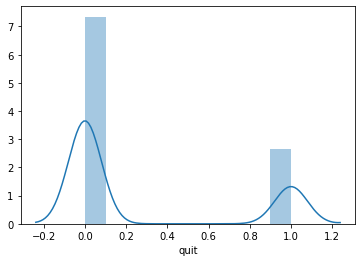

In [74]:
sns.distplot(df_new['quit'])

In [75]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 25 columns):
BeginDate                                7043 non-null datetime64[ns]
EndDate                                  7043 non-null object
PaperlessBilling                         7043 non-null int64
MonthlyCharges                           7043 non-null float64
TotalCharges                             7043 non-null float64
MultipleLines                            7043 non-null int64
OnlineSecurity                           7043 non-null int64
OnlineBackup                             7043 non-null int64
DeviceProtection                         7043 non-null int64
TechSupport                              7043 non-null int64
StreamingTV                              7043 non-null int64
StreamingMovies                          7043 non-null int64
gender                                   7043 non-null int64
SeniorCitizen                            7043 non-null int64
Partner        

In [76]:
# делаем drop по EndDate и BeginDate для того ,чтобы модель не смогла по этим features обучиться
df_new.drop('EndDate', axis = 1, inplace = True)
df_new.drop('BeginDate', axis = 1, inplace = True)

In [77]:
# делим выборку в соотношении 30/70
train_df, test_df = train_test_split(df_new, test_size = 0.3, random_state = 12345)

In [78]:
features_train = train_df.drop('quit', axis = 1)
features_test = test_df.drop('quit', axis = 1)

target_train = train_df['quit']
target_test = test_df['quit']

## Тестирование моделей

### Logistic Regression

In [79]:
# Обучим модель логистической регрессии
model_LR = LogisticRegression()
model_LR.fit(features_train, target_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
target_predict = model_LR.predict(features_test)

In [81]:
# Посчитаем roc_auc_score на тестовой выборке
roc_auc_score(target_test, target_predict)

0.6981359224619815

Feature importances:
 1. feature 'InternetService_Fiber optic' (0.6810)
 2. feature 'PaperlessBilling' (0.3505)
 3. feature 'StreamingMovies' (0.2861)
 4. feature 'StreamingTV' (0.2789)
 5. feature 'SeniorCitizen' (0.2760)
 6. feature 'PaymentMethod_Electronic check' (0.1633)
 7. feature 'MultipleLines' (0.1466)
 8. feature 'gender' (0.0410)
 9. feature 'MonthlyCharges' (0.0059)
10. feature 'TotalCharges' (-0.0003)
11. feature 'duration' (-0.0003)
12. feature 'Partner' (-0.0495)
13. feature 'DeviceProtection' (-0.0845)
14. feature 'OnlineBackup' (-0.1946)
15. feature 'PaymentMethod_Mailed check' (-0.2367)
16. feature 'PaymentMethod_Credit card (automatic)' (-0.2852)
17. feature 'Dependents' (-0.2920)
18. feature 'TechSupport' (-0.4893)
19. feature 'OnlineSecurity' (-0.5180)
20. feature 'Type_One year' (-0.5181)
21. feature 'Type_Two year' (-0.7309)
22. feature 'InternetService_No' (-0.8740)


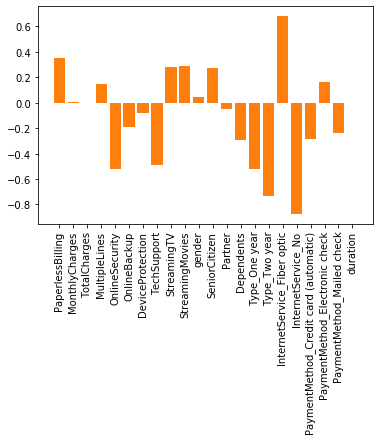

In [82]:
# Изучим, построим и отсортируем feature importance
importance = model_LR.coef_[0]
col_names = features_train.columns
indexes = np.argsort(importance)[::-1]
print("Feature importances:")
for x, idx in enumerate(indexes):
    print("{:2d}. feature '{:5s}' ({:.4f})".format(x + 1, col_names[idx], importance[idx]))
plt.bar(col_names, importance)
plt.bar([x for x in range(len(importance))], importance)
#plt.show()
plt.xticks(rotation=90)
plt.show()

In [83]:
lr_X_train = features_train[['duration', 'StreamingTV', 'StreamingMovies', 'InternetService_Fiber optic',\
                              'PaymentMethod_Electronic check', 'MultipleLines', 'SeniorCitizen', 'MonthlyCharges', 'PaperlessBilling']]

In [84]:
lr_X_test = features_test[['duration', 'StreamingTV', 'StreamingMovies', 'InternetService_Fiber optic',\
                              'PaymentMethod_Electronic check', 'MultipleLines', 'SeniorCitizen', 'MonthlyCharges', 'PaperlessBilling']]

In [85]:
# Посмотрим на корреляции между features
lr_X_train.corr()

,duration,StreamingTV,StreamingMovies,InternetService_Fiber optic,PaymentMethod_Electronic check,MultipleLines,SeniorCitizen,MonthlyCharges,PaperlessBilling
duration,1.000000,0.286170,0.294959,0.041343,-0.205748,0.333643,0.018543,0.261693,0.029657
StreamingTV,0.286170,1.000000,0.538434,0.335513,0.140887,0.261139,0.087687,0.634731,0.239118
StreamingMovies,0.294959,0.538434,1.000000,0.333161,0.143722,0.252239,0.123471,0.629964,0.225336
InternetService_Fiber optic,0.041343,0.335513,0.333161,1.000000,0.338664,0.377622,0.253001,0.791343,0.324799
PaymentMethod_Electronic check,-0.205748,0.140887,0.143722,0.338664,1.000000,0.088140,0.171735,0.273213,0.210865
MultipleLines,0.333643,0.261139,0.252239,0.377622,0.088140,1.000000,0.136951,0.493043,0.180218
SeniorCitizen,0.018543,0.087687,0.123471,0.253001,0.171735,0.136951,1.000000,0.214671,0.151991
MonthlyCharges,0.261693,0.634731,0.629964,0.791343,0.273213,0.493043,0.214671,1.000000,0.361828
PaperlessBilling,0.029657,0.239118,0.225336,0.324799,0.210865,0.180218,0.151991,0.361828,1.000000


In [86]:
# Применим PolynomialFeatures и кросс-валидацию для расчета Mean roc_auc
regressor_LR = LogisticRegression()
polynomial_features = PolynomialFeatures(degree = 2, include_bias = False)
pipeline = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", regressor_LR)])
print('Mean roc_auc =', cross_val_score(pipeline, lr_X_train, target_train, cv = 5, scoring = 'roc_auc').mean())

Mean roc_auc = 0.8003829138629689


### LGBMRegressor

In [87]:
# Обучим модель LGBM
model_LGBMR = LGBMRegressor(learning_rate = 0.03, 
                      random_state = 12345)
model_LGBMR.fit(features_train, target_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.03, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=12345, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [88]:
target_predict = model_LGBMR.predict(features_test)

In [89]:
# Посчитаем roc_auc_score на тестовой выборке
roc_auc_score(target_test, target_predict)

0.9045660673816429

Feature importances:
 1. feature 'TotalCharges' (938.0000)
 2. feature 'duration' (880.0000)
 3. feature 'MonthlyCharges' (490.0000)
 4. feature 'InternetService_Fiber optic' (80.0000)
 5. feature 'Type_Two year' (78.0000)
 6. feature 'Type_One year' (68.0000)
 7. feature 'PaperlessBilling' (51.0000)
 8. feature 'TechSupport' (48.0000)
 9. feature 'StreamingTV' (46.0000)
10. feature 'OnlineSecurity' (44.0000)
11. feature 'StreamingMovies' (42.0000)
12. feature 'PaymentMethod_Electronic check' (42.0000)
13. feature 'InternetService_No' (41.0000)
14. feature 'SeniorCitizen' (37.0000)
15. feature 'Dependents' (35.0000)
16. feature 'MultipleLines' (32.0000)
17. feature 'gender' (18.0000)
18. feature 'OnlineBackup' (11.0000)
19. feature 'DeviceProtection' (10.0000)
20. feature 'Partner' (5.0000)
21. feature 'PaymentMethod_Mailed check' (3.0000)
22. feature 'PaymentMethod_Credit card (automatic)' (1.0000)


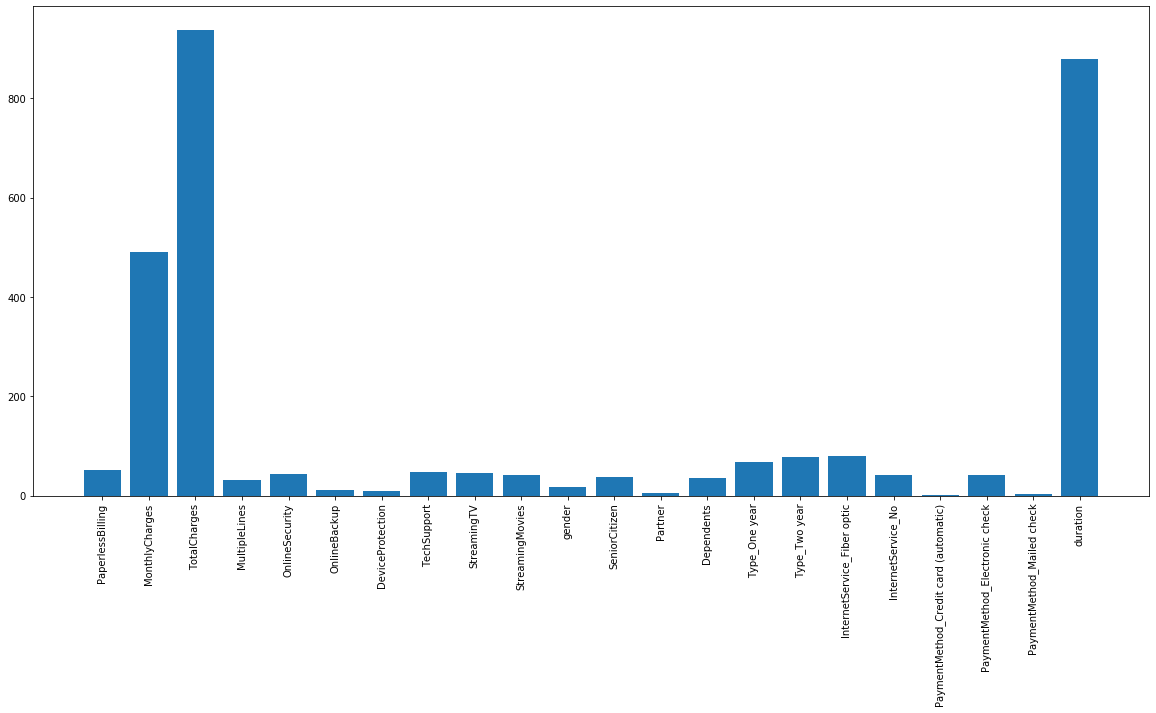

In [90]:
# Изучим, построим и отсортируем feature importance
plt.figure(figsize = (20, 9))
feature_imp = model_LGBMR.feature_importances_
col_names = features_train.columns
indexes = np.argsort(feature_imp)[::-1]
print("Feature importances:")
for x, idx in enumerate(indexes):
    print("{:2d}. feature '{:5s}' ({:.4f})".format(x + 1, col_names[idx], feature_imp[idx]))
plt.bar(col_names, feature_imp)
plt.xticks(rotation=90)
plt.show()

In [94]:
lgbm_X_train = features_train[['duration', 'MonthlyCharges', 'InternetService_Fiber optic',\
                              'Type_Two year', 'Type_One year', 'OnlineSecurity', 'TechSupport', 'PaperlessBilling']]

In [95]:
lgbm_X_test = features_train[['duration', 'MonthlyCharges', 'InternetService_Fiber optic',\
                              'Type_Two year', 'Type_One year', 'OnlineSecurity', 'TechSupport', 'PaperlessBilling']]

In [96]:
# Посмотрим на корреляции между features
lgbm_X_train.corr()

,duration,MonthlyCharges,InternetService_Fiber optic,Type_Two year,Type_One year,OnlineSecurity,TechSupport,PaperlessBilling
duration,1.000000,0.261693,0.041343,0.540538,0.203708,0.317788,0.311719,0.029657
MonthlyCharges,0.261693,1.000000,0.791343,-0.081818,0.012283,0.297705,0.334639,0.361828
InternetService_Fiber optic,0.041343,0.791343,1.000000,-0.213119,-0.073062,-0.022566,-0.017723,0.324799
Type_Two year,0.540538,-0.081818,-0.213119,1.000000,-0.293808,0.186442,0.235936,-0.139687
Type_One year,0.203708,0.012283,-0.073062,-0.293808,1.000000,0.099447,0.094989,-0.038993
OnlineSecurity,0.317788,0.297705,-0.022566,0.186442,0.099447,1.000000,0.349086,0.009161
TechSupport,0.311719,0.334639,-0.017723,0.235936,0.094989,0.349086,1.000000,0.047238
PaperlessBilling,0.029657,0.361828,0.324799,-0.139687,-0.038993,0.009161,0.047238,1.000000


In [97]:
# Применим LGBMRegressor и GridSearchCV для расчета roc_auc
modelLGBM = LGBMRegressor(random_state = 12345)
gsearchLGBM = GridSearchCV(modelLGBM,{
    'iterations': [400,500,600,1000],
    'learning_rate' : [0.03],
    'depth' : range(3,15,3)
}, cv = 5, scoring = 'roc_auc')

In [98]:
gsearchLGBM.fit(lgbm_X_train, target_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state=12345,
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='warn', n_jobs=None,
             param_grid={'depth': range(3, 15, 3),
                         'iterations': [400, 500, 600, 1000],
                         'learning_rate': [0.03]},
     

In [99]:
gsearchLGBM.best_params_

{'depth': 3, 'iterations': 400, 'learning_rate': 0.03}

In [100]:
gsearchLGBM.best_score_

0.8419348429843271

In [101]:
regressor = LGBMRegressor()
polynomial_features = PolynomialFeatures(degree = 2, include_bias = False)
pipeline = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", regressor)])
print('Mean roc_auc =', cross_val_score(pipeline, lgbm_X_train, target_train, cv = 5, scoring = 'roc_auc').mean())

Mean roc_auc = 0.8263035776565457


### Random Forest model

In [102]:
# Обучим модель слдучайного леса
model_RF = RandomForestClassifier(class_weight = 'balanced', random_state = 12345)

model_RF.fit(features_train, target_train)

prediction_rf_proba = model_RF.predict_proba(features_test)[:,1]
# Посчитаем roc_auc_score на тестовой выборке
roc_auc_score(target_test, prediction_rf_proba)

0.8421103571937975

Feature importances:
 1. feature 'duration' (0.1795)
 2. feature 'TotalCharges' (0.1687)
 3. feature 'MonthlyCharges' (0.1578)
 4. feature 'Type_Two year' (0.0960)
 5. feature 'PaymentMethod_Electronic check' (0.0633)
 6. feature 'Type_One year' (0.0420)
 7. feature 'OnlineSecurity' (0.0288)
 8. feature 'InternetService_Fiber optic' (0.0243)
 9. feature 'gender' (0.0222)
10. feature 'TechSupport' (0.0213)
11. feature 'PaperlessBilling' (0.0206)
12. feature 'Partner' (0.0196)
13. feature 'OnlineBackup' (0.0188)
14. feature 'DeviceProtection' (0.0175)
15. feature 'SeniorCitizen' (0.0174)
16. feature 'MultipleLines' (0.0166)
17. feature 'InternetService_No' (0.0164)
18. feature 'Dependents' (0.0164)
19. feature 'StreamingTV' (0.0160)
20. feature 'StreamingMovies' (0.0157)
21. feature 'PaymentMethod_Credit card (automatic)' (0.0112)
22. feature 'PaymentMethod_Mailed check' (0.0100)


<BarContainer object of 22 artists>

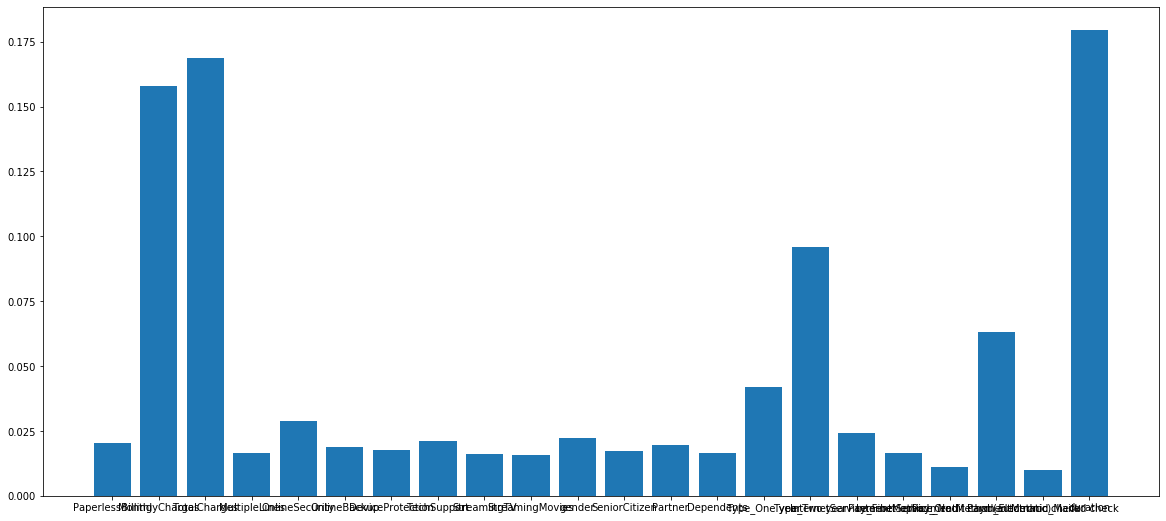

In [103]:
# Изучим, построим и отсортируем feature importance
plt.figure(figsize = (20, 9))
feature_imp = model_RF.feature_importances_
col_names = features_train.columns
indexes = np.argsort(feature_imp)[::-1]
print("Feature importances:")
for x, idx in enumerate(indexes):
    print("{:2d}. feature '{:5s}' ({:.4f})".format(x + 1, col_names[idx], feature_imp[idx]))
plt.bar(col_names, feature_imp)

In [104]:
rfc_X_train = features_train[['duration','MonthlyCharges','Type_Two year','InternetService_Fiber optic',\
                              'PaymentMethod_Electronic check','Type_One year','OnlineSecurity','gender','PaperlessBilling']]

In [105]:
rfc_X_test = features_test[['duration','MonthlyCharges','Type_Two year','InternetService_Fiber optic',\
                             'PaymentMethod_Electronic check','Type_One year','OnlineSecurity','gender','PaperlessBilling']]

In [106]:
# Посмотрим на корреляции между features
rfc_X_train.corr()

,duration,MonthlyCharges,Type_Two year,InternetService_Fiber optic,PaymentMethod_Electronic check,Type_One year,OnlineSecurity,gender,PaperlessBilling
duration,1.000000,0.261693,0.540538,0.041343,-0.205748,0.203708,0.317788,-0.004496,0.029657
MonthlyCharges,0.261693,1.000000,-0.081818,0.791343,0.273213,0.012283,0.297705,0.003849,0.361828
Type_Two year,0.540538,-0.081818,1.000000,-0.213119,-0.292274,-0.293808,0.186442,0.003152,-0.139687
InternetService_Fiber optic,0.041343,0.791343,-0.213119,1.000000,0.338664,-0.073062,-0.022566,-0.003025,0.324799
PaymentMethod_Electronic check,-0.205748,0.273213,-0.292274,0.338664,1.000000,-0.100971,-0.102769,-0.012495,0.210865
Type_One year,0.203708,0.012283,-0.293808,-0.073062,-0.100971,1.000000,0.099447,-0.006165,-0.038993
OnlineSecurity,0.317788,0.297705,0.186442,-0.022566,-0.102769,0.099447,1.000000,0.033475,0.009161
gender,-0.004496,0.003849,0.003152,-0.003025,-0.012495,-0.006165,0.033475,1.000000,0.016449
PaperlessBilling,0.029657,0.361828,-0.139687,0.324799,0.210865,-0.038993,0.009161,0.016449,1.000000


In [107]:
# Применим RandomForestClassifier и GridSearchCV для расчета roc_auc
rfc = GridSearchCV(RandomForestClassifier(criterion = 'entropy', class_weight='balanced'),{
    'max_depth': range(3,15,3),
    'n_estimators': range(10,100, 10),
    'min_samples_split' : range(4,28,4),
    'min_samples_leaf' : range(3,13,2)
}, cv = 5, scoring = 'roc_auc')

In [108]:
rfc.fit(rfc_X_train,target_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_sta

In [109]:
rfc.best_params_

{'max_depth': 9,
 'min_samples_leaf': 3,
 'min_samples_split': 20,
 'n_estimators': 70}

In [110]:
rfc.best_score_

0.8499949546717085

In [111]:
model_RF = RandomForestClassifier(class_weight = 'balanced', criterion = 'entropy', max_depth = 9, min_samples_leaf = 7,\
                                     min_samples_split = 20, n_estimators = 70, random_state = 12345)

model_RF.fit(rfc_X_train, target_train)

prediction_rf_proba = model_RF.predict_proba(rfc_X_test)[:,1]

roc_auc_score(target_test, prediction_rf_proba)

0.8436459260164866

In [112]:
forestPrediction = model_RF.predict(rfc_X_test)
accuracy_score(target_test, forestPrediction)

0.7600567912920019

### CatBoostClassifier

In [113]:
# Для ускорения процесса обучения используем внутреннюю структура данных у catboost через Pool
train_dataset = Pool(features_train, target_train)
test_dataset = Pool(features_test, target_test)

In [114]:
# Обучим модель CatBoostClassifier
model_CBC = CatBoostClassifier(loss_function = 'CrossEntropy', learning_rate = 0.03, random_state = 12345)
model_CBC.fit(train_dataset, eval_set = test_dataset, plot = True, verbose = False)
prediction_CBC_proba = model_CBC.predict_proba(features_test)[:,1]
roc_auc_score(target_test, prediction_CBC_proba)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0.9318395356050468

,Feature Id,Importances
0,duration,28.033570
1,TotalCharges,27.517475
2,MonthlyCharges,14.931184
3,Type_Two year,4.787379
4,InternetService_Fiber optic,3.914418
5,InternetService_No,2.328703
6,Type_One year,1.964238
7,PaymentMethod_Electronic check,1.766185
8,Dependents,1.421758
9,gender,1.344262


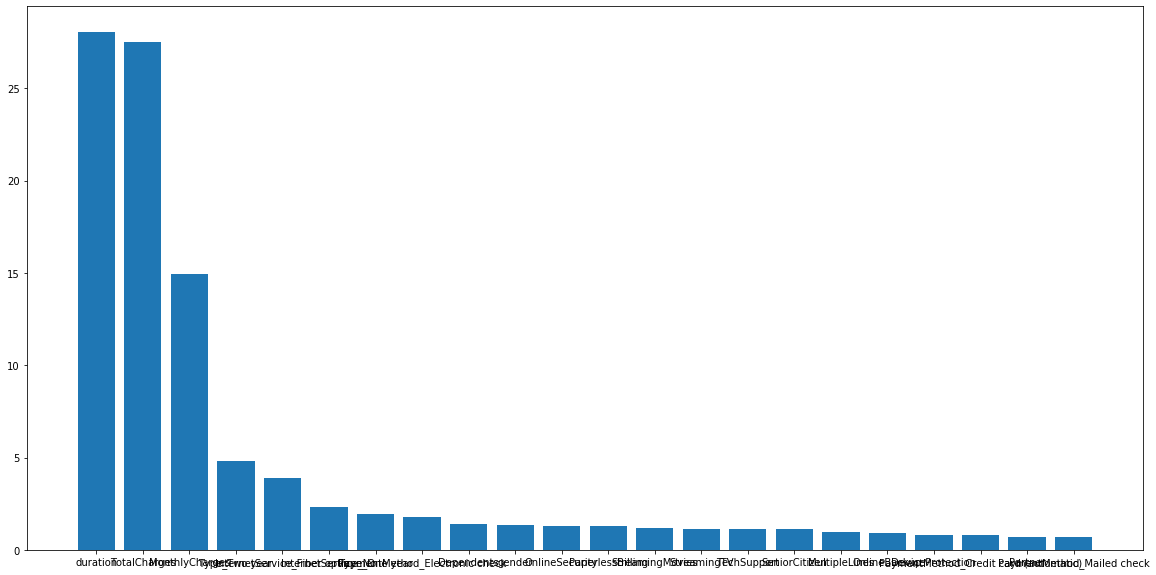

In [115]:
# Изучим, построим и отсортируем feature importance
plt.figure(figsize = (20, 10))
feature_import = model_CBC.get_feature_importance(train_dataset, prettified = True)
plt.bar(feature_import['Feature Id'], feature_import['Importances'])
feature_import

In [116]:
cat_X_train = features_train[['duration','Type_Two year','InternetService_Fiber optic',\
                              'Type_One year','PaymentMethod_Electronic check','PaperlessBilling','MultipleLines','StreamingMovies','InternetService_No']]
cat_X_test = features_test[['duration','Type_Two year','InternetService_Fiber optic',\
                              'Type_One year','PaymentMethod_Electronic check','PaperlessBilling','MultipleLines','StreamingMovies','InternetService_No']]
train_dataset = Pool(cat_X_train, target_train)
test_dataset = Pool(cat_X_test, target_test)

In [119]:
# Посмотрим на корреляции между features
cat_X_train.corr()

,duration,Type_Two year,InternetService_Fiber optic,Type_One year,PaymentMethod_Electronic check,PaperlessBilling,MultipleLines,StreamingMovies,InternetService_No
duration,1.000000,0.540538,0.041343,0.203708,-0.205748,0.029657,0.333643,0.294959,-0.052649
Type_Two year,0.540538,1.000000,-0.213119,-0.293808,-0.292274,-0.139687,0.095425,0.065905,0.214525
InternetService_Fiber optic,0.041343,-0.213119,1.000000,-0.073062,0.338664,0.324799,0.377622,0.333161,-0.468881
Type_One year,0.203708,-0.293808,-0.073062,1.000000,-0.100971,-0.038993,-0.007694,0.065631,0.026043
PaymentMethod_Electronic check,-0.205748,-0.292274,0.338664,-0.100971,1.000000,0.210865,0.088140,0.143722,-0.282273
PaperlessBilling,0.029657,-0.139687,0.324799,-0.038993,0.210865,1.000000,0.180218,0.225336,-0.328464
MultipleLines,0.333643,0.095425,0.377622,-0.007694,0.088140,0.180218,1.000000,0.252239,-0.212740
StreamingMovies,0.294959,0.065905,0.333161,0.065631,0.143722,0.225336,0.252239,1.000000,-0.428477
InternetService_No,-0.052649,0.214525,-0.468881,0.026043,-0.282273,-0.328464,-0.212740,-0.428477,1.000000


In [117]:
# Применим CatBoostClassifier и GridSearchCV для расчета roc_auc
model_CBC = CatBoostClassifier(random_state = 12345)
gsearchCat = GridSearchCV(model_CBC,{
    'iterations': [400,500,600,1000],
    'learning_rate' : [0.03],
    'depth' : range(3,15,3),
    'verbose' : [False]
}, cv = 5,scoring = 'roc_auc')

In [120]:
gsearchCat.fit(cat_X_train, target_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=<catboost.core.CatBoostClassifier object at 0x7f948fe23c50>,
             iid='warn', n_jobs=None,
             param_grid={'depth': range(3, 15, 3),
                         'iterations': [400, 500, 600, 1000],
                         'learning_rate': [0.03], 'verbose': [False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [121]:
gsearchCat.best_params_

{'depth': 3, 'iterations': 400, 'learning_rate': 0.03, 'verbose': False}

In [122]:
gsearchCat.best_score_

0.8546881721572229

In [123]:
model_CBC = CatBoostClassifier(loss_function = 'CrossEntropy', iterations = 1000, depth = 3,\
                               learning_rate = 0.03, random_state = 12345)

In [124]:
model_CBC.fit(train_dataset, eval_set = test_dataset, verbose = False)

In [125]:
prediction_CBC_proba = model_CBC.predict_proba(cat_X_test)[:,1]

In [126]:
roc_auc_score(target_test, prediction_CBC_proba)

0.8546711177220376

In [127]:
CBC_Prediction = model_CBC.predict(cat_X_test)
accuracy_score(target_test, CBC_Prediction)

0.8031235210601041

## Выводы 

Для решения поставленной задачи использовались следующие модели : Linear Regression, Random Forest, CatBoost, LGBM. В итоге после обучения и выявления лучших параметров была получена лучшая модель - это LGBM с roc_auc = 0.893 (со следующими параметрами {'depth': 3, 'iterations': 400, 'learning_rate': 0.03}). Формально показатели почти равны как и у CatBoost, но было принято решение ориентироваться на финальные цифры, в данном случае вызывает больше доверие LightGBM как более продвинутая, гибкая и быстрая модель (CatBoost долго считал по сравнению с LGBM). Самые слабые результаты были получены у модели Logistic Regression. В основном почти по всем моделям были отобраны одинаковые features : 'duration','Type_Two year','InternetService_Fiber optic', 'Type_One year', 'PaymentMethod_ElectronicCheck', 'PaperlessBilling', 'MultipleLines', 'StreamingMovies', 'InternetService_No', остальное шум. Корреляция между features в основном положительная и примерно одинаковая по значениям, это диапазон 0.3-0.5.

По ходу расчетов и по ранее обозначенному плану. В процессе исследовательского анализа пришел к выводу , что основная масса пользователей, покинувших оператора связи сделали это в месяц подключения, то есть дальше одного месяца они не пользовались услугами, предполагаю, что  это говорит о том, что либо у оператора явно что то не так с предоставлением услуг, либо эти люди подключились посмотреть и только с целью протестировать как и что работает. Далее пришлось поменять формат данных в некоторых столюцах для проведения OHE кодировки. Были ликвидированы признаки с помощью которых модель в дальнейшем могла подсмотреть и как следствие переобучиться, плюс к этому выявление feature_importance, т.е. основных признаков для алгоритма. Далее пошло обучение моделей, в каких-то моделях использовался GridSearchCV , в каких-то  Pipeline, общая выборка при этом делилась на test и train. Настроил гиперпараметры вместе с кросс-валидацией.